## Will you bust the ghost or destroy the world?

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
all_ghostbusters = np.arange(1,21)

In [4]:
abe, betty, candace, dan = np.random.choice(all_ghostbusters, 4, replace=False).ravel()

In [5]:
print(abe, betty, candace, dan)

13 16 4 6


In [6]:
def get_beams_crossing(abe,betty,candace,dan):
    #case 1 for success: candace and dan both "inside" abe and betty
    #case 2 for success: candace and dan both "outside" abe and betty
    if (betty>abe):
        #print("betty > abe")
        case_1 = (abe<candace<betty) and (abe<dan<betty)
        case_2 = ~(abe<candace<betty) and ~(abe<dan<betty)
    elif (betty<abe):
        #print("betty < abe")
        case_1 = (abe>candace>betty) and (abe>dan>betty)
        case_2 = ~(abe>candace>betty) and ~(abe>dan>betty)
    success = int(case_1 or case_2)
    #print(success)
    return success

In [7]:
def simulation(n_sim):
    successes = 0
    all_ghostbusters = np.arange(1,21)
    for sim in range(int(n_sim)):
        abe, betty, candace, dan = np.random.choice(all_ghostbusters, 4, replace=False).ravel()
        successes+= get_beams_crossing(abe, betty, candace, dan)
        
    return successes

Simulation

In [8]:
lst_n_sim = [10**x for x in range(1,8)]
lst_results = [] # contains failures

for n_sim in lst_n_sim:
    successes = simulation(n_sim)
    lst_results.append(1- successes/n_sim)

Text(0,0.5,'Probability of Crossing Streams')

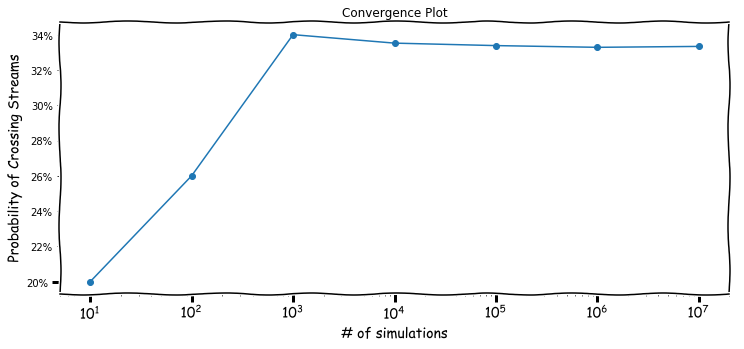

In [12]:
plt.xkcd()
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(lst_n_sim, lst_results, '-o')
ax.set_xscale('log')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.set_title('Convergence Plot')
ax.set_xlabel('# of simulations')
ax.set_ylabel('Probability of Crossing Streams')